In [5]:
import os 
import random 
import numpy as np
import pandas as pd 
import tensorflow as tf 
from pprint import pprint 
from pylab import plt,mpl 
plt.style.use('seaborn-v0_8')
mpl.rcParams['savefig.dpi']=300
mpl.rcParams['font.family'] ='serif'
pd.set_option('display.precision',4)
np.set_printoptions(suppress=True,precision=4)
os.environ['PYTHONHASHSEED'] = '0'

In [6]:
def set_seeds(seed=100):
  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(seed)


In [7]:
set_seeds()

In [8]:
a = np.arange(100)
a = a.reshape(len(a),-1)
print(a.shape)
print(a[:5])



(100, 1)
[[0]
 [1]
 [2]
 [3]
 [4]]


In [16]:
import tensorflow as tf

In [18]:
lags=3

In [20]:
g = tf.keras.preprocessing.sequence.TimeseriesGenerator(a,a,length=lags,batch_size=5)

In [21]:
pprint(list(g)[0])

(array([[[0],
        [1],
        [2]],

       [[1],
        [2],
        [3]],

       [[2],
        [3],
        [4]],

       [[3],
        [4],
        [5]],

       [[4],
        [5],
        [6]]]),
 array([[3],
       [4],
       [5],
       [6],
       [7]]))


In [22]:
from keras.models import Sequential
from keras.layers import SimpleRNN,LSTM,Dense 
model = Sequential()
model.add(SimpleRNN(100,activation='relu',input_shape=(lags,1)))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adagrad',loss='mse',metrics=['mae'])
model.summary()


/Users/baijuyadav/Desktop/deeplearningfromscratch/deeplearningscratch/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 100)            │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,301 (40.24 KB)

 Trainable params: 10,301 (40.24 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
%%time 
model.fit(g,epochs=1000,steps_per_epoch=5,verbose=False)

CPU times: user 6.66 s, sys: 608 ms, total: 7.26 s
Wall time: 5.83 s


In [24]:
res = pd.DataFrame(model.history.history)

In [25]:
res.tail(3)

,loss,mae
997,0.6640,0.6789
998,1.4249,0.9499
999,1.0367,0.9111


<Axes: >

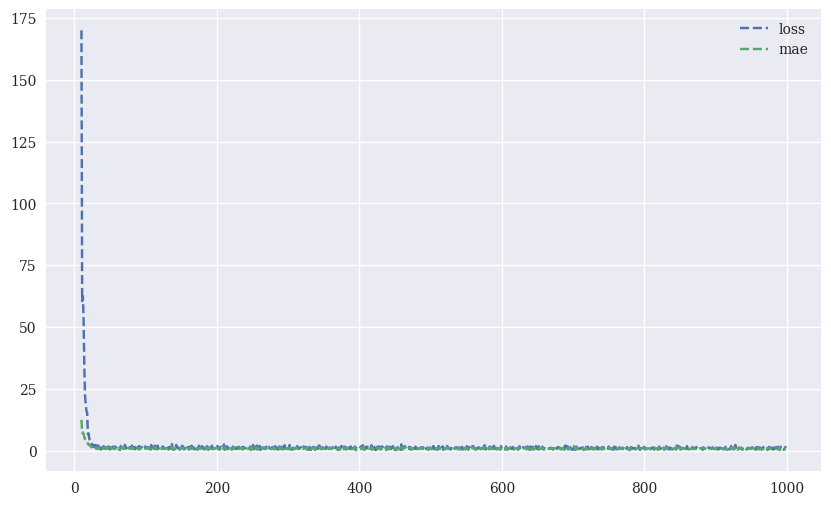

In [27]:
res.iloc[10:].plot(figsize=(10, 6),style=['--','--'])